In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autots as at
import yfinance as yf

In [2]:
data = yf.download("BTC-USD",
                  start = "2021-01-01",
                  end = "2022-03-29",
                  progress = False)
data = pd.DataFrame(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344


In [3]:
res_data = data.reset_index()
res_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
1,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
3,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
4,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344


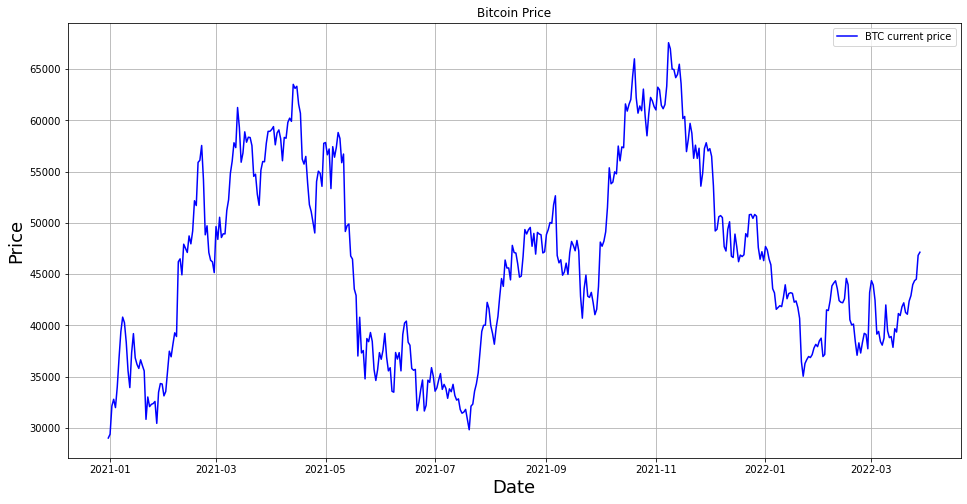

In [4]:
res_data = res_data[["Date", "Close"]]
res_data["Date"] = pd.to_datetime(res_data.Date)
# res_data["Close"].plot(figsize=(16, 8), title="BTC Current Prices", fontsize=15, label="Close Price")

plt.figure(figsize = (16, 8))
plt.grid(True)
plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()
# plt.legend()
# plt.grid()
# plt.show()

In [5]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(res_data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print("Price prediction of Bitcoin")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 9s 9ms/step - loss: 0.4061
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3822
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3594
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3441
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3191
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2984
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2662
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2475
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2263
Epoch 10/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2065
Epoch 11/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1976
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1939
Epoch

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 22 with model LastValueNaive in generation 0 of 10
Model Number: 23 with model LastValueNaive in generation 0 of 10
Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalNaive in generation 0 of 10
Model Number: 26 with model SeasonalNaive in generation 0 of 10
Model Number: 27 with model SeasonalNaive in generation 0 of 10
Model Number: 28 with model UnobservedComponents in generation 0 of 10
Model Number: 29 with model UnobservedComponents in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 31: VAR
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 3

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divi

Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model Number: 55 with model UnivariateMotif in generation 0 of 10
Model Number: 56 with model MultivariateMotif in generation 0 of 10
Model Number: 57 with model SectionalMotif in generation 0 of 10
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 60: ARDL
Model Number: 61 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\util

Model Number: 66 with model WindowRegression in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71: VECM
Model Number: 72 with model MultivariateMotif in generation 0 of 10
Model Number: 73 with model GLS in generation 0 of 10
Model Number: 74 with model MultivariateMotif in generation 0 of 10
Model Number: 75 with model DatepartRegression i

3/3 [==============================] - 0s 49ms/step - loss: 1507.0613 - val_loss: 1027.3824
Epoch 20/100
3/3 [==============================] - 0s 51ms/step - loss: 1506.7637 - val_loss: 1027.0375
Epoch 21/100
3/3 [==============================] - 0s 50ms/step - loss: 1506.3108 - val_loss: 1026.7883
Epoch 22/100
3/3 [==============================] - 0s 49ms/step - loss: 1506.1656 - val_loss: 1026.2611
Epoch 23/100
3/3 [==============================] - 0s 47ms/step - loss: 1505.6920 - val_loss: 1025.9730
Epoch 24/100
3/3 [==============================] - 0s 49ms/step - loss: 1505.7178 - val_loss: 1025.4159
Epoch 25/100
3/3 [==============================] - 0s 47ms/step - loss: 1504.9725 - val_loss: 1025.2123
Epoch 26/100
3/3 [==============================] - 0s 53ms/step - loss: 1505.5104 - val_loss: 1024.8601
Epoch 27/100
3/3 [==============================] - 0s 44ms/step - loss: 1504.9467 - val_loss: 1024.5413
Epoch 28/100
3/3 [==============================] - 0s 49ms/step - l

3/3 [==============================] - 0s 44ms/step - loss: 1491.4663 - val_loss: 1007.8880
Epoch 98/100
3/3 [==============================] - 0s 49ms/step - loss: 1493.3993 - val_loss: 1008.1205
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 112: DatepartRegression
Model Number: 113 with model ZeroesNaive in generation 0 of 10
Model Number: 114 with model SeasonalNaive in generation 0 of 10
Model Number: 115 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 115: GluonTS
Model Number: 116 with model SeasonalNaive in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWa

Model Number: 117 with model GLS in generation 0 of 10
Model Number: 118 with model AverageValueNaive in generation 0 of 10
Model Number: 119 with model SeasonalNaive in generation 0 of 10
Model Number: 120 with model NVAR in generation 0 of 10
Model Number: 121 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 121: VECM
Model Number: 122 with model MultivariateMotif in generation 0 of 10
Model Number: 123 with model LastValueNaive in generation 0 of 10
Model Number: 124 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 124: ARDL
Model Number: 125 with model MultivariateMotif in generation 0 of 10
Model Number: 126 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 126: FBProphet
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable t

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 190 with model ZeroesNaive in generation 1 of 10
Model Number: 191 with model ZeroesNaive in generation 1 of 10
Model Number: 192 with model ZeroesNaive in generation 1 of 10
Model Number: 193 with model UnivariateMotif in generation 1 of 10
Model Number: 194 with model UnivariateMotif in generation 1 of 10
Model Number: 195 with model UnivariateMotif in generation 1 of 10
Model Number: 196 with model UnivariateMotif in generation 1 of 10
Model Number: 197 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 197: GLM
Model Number: 198 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 198: GLM
Model Number: 1

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 201 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 201: GluonTS
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 202: GluonTS
Model Number: 203 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 203: GluonTS
Model Number: 204 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 204: GluonTS
Model Number: 205 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 205: VAR
Model Number: 206 with model VAR in generation 1 of 10
Template Eval E

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 289: VECM
Model Number: 290 with model VECM in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 290: VECM
Model Number: 291 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 291: FBProphet
Model Number: 292 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 292: FBProphet
Model Number: 293 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 293: FBProphet
Model Number: 294 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 294: FBProphet
New Generation: 3 of 10
Model Number: 295 with model NVAR in generation 3 of 10
Model

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 318 with model MultivariateRegression in generation 3 of 10
Model Number: 319 with model MultivariateRegression in generation 3 of 10
Model Number: 320 with model LastValueNaive in generation 3 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'cffilter', '1': 'IntermittentOccurrence', '2': 'Slice', '3': 'MinMaxScaler', '4': 'ClipOutliers'}, 'transformation_params': {'0': {}, '1': {'center': 'mean'}, '2': {'method': 0.5}, '3': {}, '4': {'method': 'clip', 'std_threshold': 4, 'fillna': None}}}. fail_on_forecast_nan=True") in model 320: LastValueNaive
Model Number: 321 with model LastValueNaive in generation 3 of 10
Model Number: 322 with model LastValueNaive in generation 3 of 10
Model Number: 323 with model ARDL in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 324 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 324: ARDL
Model Number: 325 with model ARDL in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 325: ARDL
Model Number: 326 with model ARDL in generation 3 of 10
Model Number: 327 with model UnobservedComponents in generation 3 of 10
Model Number: 328 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 328: UnobservedComponents
Model Number: 329 with model UnobservedComponents in generation 3 of 10
Model Number: 330 with model SeasonalNaive in generation 3 of 10
Model Number: 331 with model SeasonalNaive in generation 3 of 10
Model Number: 332 with model SeasonalNaive in generation 3 of 10
Model Number: 333 with model SeasonalNaive in generation 3 of 10
Model Number: 334 with model DatepartReg

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWa

Model Number: 336 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 337 with model Theta in generation 3 of 10
Model Number: 338 with model Theta in generation 3 of 10
Model Number: 339 with model Theta in generation 3 of 10
Model Number: 340 with model Theta in generation 3 of 10
Model Number: 341 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 341: GLM
Model Number: 342 with model GLM in generation 3 of 10
Model Number: 343 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 343: GLM
Model Number: 344 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


New Generation: 4 of 10
Model Number: 370 with model NVAR in generation 4 of 10
Model Number: 371 with model NVAR in generation 4 of 10
Model Number: 372 with model NVAR in generation 4 of 10
Model Number: 373 with model NVAR in generation 4 of 10
Model Number: 374 with model WindowRegression in generation 4 of 10
Model Number: 375 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 375: WindowRegression
Model Number: 376 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 376: WindowRegression
Model Number: 377 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 377: SectionalMotif
Model Number: 378 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError("regression_type=='User

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 393 with model MultivariateRegression in generation 4 of 10
Model Number: 394 with model MultivariateRegression in generation 4 of 10
Model Number: 395 with model LastValueNaive in generation 4 of 10
Model Number: 396 with model LastValueNaive in generation 4 of 10
Model Number: 397 with model LastValueNaive in generation 4 of 10
Model Number: 398 with model ARDL in generation 4 of 10
Model Number: 399 with model ARDL in generation 4 of 10
Model Number: 400 with model ARDL in generation 4 of 10
Model Number: 401 with model UnobservedComponents in generation 4 of 10
Model Number: 402 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 402: UnobservedComponents
Model Number: 403 with model UnobservedComponents in generation 4 of 10
Model Number: 404 with model SeasonalNaive in generation 4 of 10
Model Number: 405 with model SeasonalNaive in generation 4 of 10
Model Number: 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWa

Model Number: 407 with model SeasonalNaive in generation 4 of 10
Model Number: 408 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 408: DatepartRegression
Model Number: 409 with model DatepartRegression in generation 4 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWa

Model Number: 410 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 410: DatepartRegression
Model Number: 411 with model Theta in generation 4 of 10
Model Number: 412 with model Theta in generation 4 of 10
Model Number: 413 with model Theta in generation 4 of 10
Model Number: 414 with model Theta in generation 4 of 10
Model Number: 415 with model GLM in generation 4 of 10
Model Number: 416 with model GLM in generation 4 of 10
Model Number: 417 with model GLM in generation 4 of 10
Model Number: 418 with model ETS in generation 4 of 10
Model Number: 419 with model ETS in generation 4 of 10
Model Number: 420 with model ETS in generation 4 of 10
Model Number: 421 with model ETS in generation 4 of 10
Model Number: 422 with model UnivariateMotif in generation 4 of 10
Model Number: 423 with model UnivariateMotif in generation 4 of 10
Model Number: 424 with model UnivariateMotif in generation 4 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 455 with model AverageValueNaive in generation 5 of 10
Model Number: 456 with model AverageValueNaive in generation 5 of 10
Model Number: 457 with model SectionalMotif in generation 5 of 10
Model Number: 458 with model SectionalMotif in generation 5 of 10
Model Number: 459 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 459: SectionalMotif
Model Number: 460 with model SectionalMotif in generation 5 of 10
Model Number: 461 with model GLS in generation 5 of 10
Model Number: 462 with model GLS in generation 5 of 10
Model Number: 463 with model GLS in generation 5 of 10
Model Number: 464 with model MultivariateRegression in generation 5 of 10
Model Number: 465 with model MultivariateRegression in generation 5 of 10
Model Number: 466 with model MultivariateRegression in generation 5 of 10
Model Number: 467 with model MultivariateRegression in generation 5 of 10
Template Eval Er

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 481 with model DatepartRegression in generation 5 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 482 with model DatepartRegression in generation 5 of 10
Model Number: 483 with model Theta in generation 5 of 10
Model Number: 484 with model Theta in generation 5 of 10
Model Number: 485 with model Theta in generation 5 of 10
Model Number: 486 with model Theta in generation 5 of 10
Model Number: 487 with model ETS in generation 5 of 10
Model Number: 488 with model ETS in generation 5 of 10
Model Number: 489 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 490 with model ETS in generation 5 of 10
Model Number: 491 with model GLM in generation 5 of 10
Model Number: 492 with model GLM in generation 5 of 10
Model Number: 493 with model GLM in generation 5 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 494 with model GLM in generation 5 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 494: GLM
Model Number: 495 with model ZeroesNaive in generation 5 of 10
Model Number: 496 with model ZeroesNaive in generation 5 of 10
Model Number: 497 with model ZeroesNaive in generation 5 of 10
Model Number: 498 with model UnivariateMotif in generation 5 of 10
Model Number: 499 with model UnivariateMotif in generation 5 of 10
Model Number: 500 with model UnivariateMotif in generation 5 of 10
Model Number: 501 with model UnivariateMotif in generation 5 of 10
Model Number: 502 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 502: GluonTS
Model Number: 503 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_tr


Template Eval Error: ValueError('Only gave one variable to VECM') in model 511: VECM
Model Number: 512 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 512: VECM
Model Number: 513 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 513: VECM
Model Number: 514 with model FBProphet in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 514: FBProphet
Model Number: 515 with model FBProphet in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 515: FBProphet
Model Number: 516 with model FBProphet in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 516: FBProphet
Model Number: 517 with model FBProphet in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 517: FBProphet
New Generati

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature n

Model Number: 546 with model ARDL in generation 6 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 546: ARDL
Model Number: 547 with model ARDL in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Model Number: 548 with model ARDL in generation 6 of 10
Template Eval Error: IndexError('tuple index out of range') in model 548: ARDL
Model Number: 549 with model UnobservedComponents in generation 6 of 10
Model Number: 550 with model UnobservedComponents in generation 6 of 10
Model Number: 551 with model UnobservedComponents in generation 6 of 10
Model Number: 552 with model SeasonalNaive in generation 6 of 10
Model Number: 553 with model SeasonalNaive in generation 6 of 10
Model Number: 554 with model SeasonalNaive in generation 6 of 10
Model Number: 555 with model SeasonalNaive in generation 6 of 10
Model Number: 556 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 557 with model DatepartRegression in generation 6 of 10
Model Number: 558 with model DatepartRegression in generation 6 of 10
Model Number: 559 with model Theta in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / p

Model Number: 560 with model Theta in generation 6 of 10
Model Number: 561 with model Theta in generation 6 of 10
Model Number: 562 with model Theta in generation 6 of 10
Model Number: 563 with model ETS in generation 6 of 10
Model Number: 564 with model ETS in generation 6 of 10
Model Number: 565 with model ETS in generation 6 of 10
Model Number: 566 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 566: GLM
Model Number: 567 with model GLM in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 568 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 568: GLM
Model Number: 569 with model ZeroesNaive in generation 6 of 10
Model Number: 570 with model ZeroesNaive in generation 6 of 10
Model Number: 571 with model ZeroesNaive in generation 6 of 10
Model Number: 572 with model UnivariateMotif in generation 6 of 10
Model Number: 573 with model UnivariateMotif in generation 6 of 10
Model Number: 574 with model UnivariateMotif in generation 6 of 10
Model Number: 575 with model UnivariateMotif in generation 6 of 10
Model Number: 576 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 576: GluonTS
Model Number: 577 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 588: FBProphet
Model Number: 589 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 589: FBProphet
Model Number: 590 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 590: FBProphet
Model Number: 591 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 591: FBProphet
New Generation: 7 of 10
Model Number: 592 with model NVAR in generation 7 of 10
Model Number: 593 with model NVAR in generation 7 of 10
Model Number: 594 with model NVAR in generation 7 of 10
Model Number: 595 with model AverageValueNaive in generation 7 of 10
Model Number: 596 with model AverageValueNaive in generation 7 of 10
Model Number: 597 with model AverageValueNaive in generation 7 of 10
Model Number: 598 with model MultivariateM

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names,

Model Number: 631 with model DatepartRegression in generation 7 of 10
Model Number: 632 with model Theta in generation 7 of 10
Model Number: 633 with model Theta in generation 7 of 10
Model Number: 634 with model Theta in generation 7 of 10
Model Number: 635 with model Theta in generation 7 of 10
Model Number: 636 with model ETS in generation 7 of 10
Model Number: 637 with model ETS in generation 7 of 10
Model Number: 638 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 639 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 640 with model GLM in generation 7 of 10
Model Number: 641 with model GLM in generation 7 of 10
Model Number: 642 with model GLM in generation 7 of 10
Model Number: 643 with model GLM in generation 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 644 with model ZeroesNaive in generation 7 of 10
Model Number: 645 with model ZeroesNaive in generation 7 of 10
Model Number: 646 with model ZeroesNaive in generation 7 of 10
Model Number: 647 with model UnivariateMotif in generation 7 of 10
Model Number: 648 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 648: UnivariateMotif
Model Number: 649 with model UnivariateMotif in generation 7 of 10
Model Number: 650 with model UnivariateMotif in generation 7 of 10
Model Number: 651 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 651: GluonTS
Model Number: 652 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 652: Gluon

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:527: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 655: VAR
Model Number: 656 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 656: VAR
Model Number: 657 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 657: VAR
Model Number: 658 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 658: VAR
Model Number: 659 with model VECM in generation 7 of

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e-04, tolerance: 2.761e-04
  model = cd_fast.enet_coordinate_descent(


Model Number: 716 with model Theta in generation 8 of 10
Model Number: 717 with model Theta in generation 8 of 10
Model Number: 718 with model Theta in generation 8 of 10
Model Number: 719 with model ETS in generation 8 of 10
Model Number: 720 with model ETS in generation 8 of 10
Model Number: 721 with model ETS in generation 8 of 10
Model Number: 722 with model ETS in generation 8 of 10
Model Number: 723 with model GLM in generation 8 of 10
Model Number: 724 with model GLM in generation 8 of 10
Model Number: 725 with model GLM in generation 8 of 10
Model Number: 726 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 726: GLM
Model Number: 727 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in m

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 761 with model SectionalMotif in generation 9 of 10
Model Number: 762 with model SectionalMotif in generation 9 of 10
Model Number: 763 with model SectionalMotif in generation 9 of 10
Model Number: 764 with model MultivariateRegression in generation 9 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\ibrag\AppData\Local\Programs\Python\Python3

Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 764: MultivariateRegression
Model Number: 765 with model MultivariateRegression in generation 9 of 10
Model Number: 766 with model MultivariateRegression in generation 9 of 10
Model Number: 767 with model MultivariateRegression in generation 9 of 10
Model Number: 768 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 768: ARDL
Model Number: 769 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 769: ARDL
Model Number: 770 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 770: ARDL
Model Number: 771 with model ARDL in generation 9 of 10
Model Number: 772 with model LastValueNaive in generation

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 800 with model GLM in generation 9 of 10
Model Number: 801 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 801: GluonTS
Model Number: 802 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 802: GluonTS
Model Number: 803 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 803: GluonTS
Model Number: 804 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 804: GluonTS
Model Number: 805 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 805: VAR
Model Number: 8

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 811: VECM
Model Number: 812 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 812: VECM
Model Number: 813 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 813: FBProphet
Model Number: 814 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 814: FBProphet
Model Number: 815 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 815: FBProphet
Model Number: 816 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 816: FBProphet
New Generation: 10 of 10
Model Number: 817 with model NVAR in generation 10 of 10
Model Number: 818 with model NVAR in generation

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWa

Model Number: 862 with model ETS in generation 10 of 10
Model Number: 863 with model ETS in generation 10 of 10
Model Number: 864 with model ETS in generation 10 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 865 with model ETS in generation 10 of 10
Model Number: 866 with model DatepartRegression in generation 10 of 10
Model Number: 867 with model DatepartRegression in generation 10 of 10
Model Number: 868 with model DatepartRegression in generation 10 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 869 with model Theta in generation 10 of 10
Model Number: 870 with model Theta in generation 10 of 10
Model Number: 871 with model Theta in generation 10 of 10
Model Number: 872 with model Theta in generation 10 of 10
Model Number: 873 with model Ensemble in generation 11 of 0


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\ensemble.py:918: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mods = pd.Series()


Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0
Model Number: 876 with model Ensemble in generation 11 of 0


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divid

Model Number: 877 with model Ensemble in generation 11 of 0
Model Number: 878 with model Ensemble in generation 11 of 0
Model Number: 879 with model Ensemble in generation 11 of 0
Model Number: 880 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 132 with model Ensemble for Validation 1
1 - Ensemble with avg smape 3.46: 
Model Number: 2 of 132 with model Ensemble for Validation 1
2 - Ensemble with avg smape 6.2: 
Model Number: 3 of 132 with model Ensemble for Validation 1
3 - Ensemble with avg smape 5.23: 
Model Number: 4 of 132 with model Ensemble for Validation 1
4 - Ensemble with avg smape 7.37: 
Model Number: 5 of 132 with model Ensemble for Validation 1
5 - Ensemble with avg smape 7.35: 
Model Number: 6 of 132 with model NVAR for Validation 1
6 - NVAR with avg smape 6.21: 
Model Number: 7 of 132 with model Ensemble for Validation 1
7 - Ensemble with avg smape 6.21: 
Model Number: 8 of 132 with model NVAR for Validation 1
8 - NVAR with avg smape 6.21

77 - UnobservedComponents with avg smape 8.33: 
Model Number: 78 of 132 with model UnobservedComponents for Validation 1
78 - UnobservedComponents with avg smape 9.45: 
Model Number: 79 of 132 with model WindowRegression for Validation 1
79 - WindowRegression with avg smape 6.5: 
Model Number: 80 of 132 with model SeasonalNaive for Validation 1


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80 - SeasonalNaive with avg smape 10.93: 
Model Number: 81 of 132 with model ETS for Validation 1
81 - ETS with avg smape 6.36: 
Model Number: 82 of 132 with model ZeroesNaive for Validation 1
82 - ZeroesNaive with avg smape 6.3: 
Model Number: 83 of 132 with model ZeroesNaive for Validation 1
83 - ZeroesNaive with avg smape 6.3: 
Model Number: 84 of 132 with model ZeroesNaive for Validation 1
84 - ZeroesNaive with avg smape 6.3: 
Model Number: 85 of 132 with model ETS for Validation 1
85 - ETS with avg smape 6.58: 
Model Number: 86 of 132 with model UnivariateMotif for Validation 1
86 - UnivariateMotif with avg smape 34.25: 
Model Number: 87 of 132 with model UnivariateMotif for Validation 1
87 - UnivariateMotif with avg smape 34.22: 
Model Number: 88 of 132 with model SeasonalNaive for Validation 1
88 - SeasonalNaive with avg smape 7.16: 
Model Number: 89 of 132 with model UnobservedComponents for Validation 1
89 - UnobservedComponents with avg smape 10.88: 
Model Number: 90 of 132 w

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - Theta with avg smape 8.87: 
Model Number: 92 of 132 with model SeasonalNaive for Validation 1
92 - SeasonalNaive with avg smape 10.04: 
Model Number: 93 of 132 with model UnobservedComponents for Validation 1
93 - UnobservedComponents with avg smape 11.19: 
Model Number: 94 of 132 with model Theta for Validation 1
94 - Theta with avg smape 31.55: 
Model Number: 95 of 132 with model Theta for Validation 1
95 - Theta with avg smape 8.71: 
Model Number: 96 of 132 with model Theta for Validation 1
96 - Theta with avg smape 8.71: 
Model Number: 97 of 132 with model UnobservedComponents for Validation 1
97 - UnobservedComponents with avg smape 11.08: 
Model Number: 98 of 132 with model UnobservedComponents for Validation 1
98 - UnobservedComponents with avg smape 11.27: 
Model Number: 99 of 132 with model Theta for Validation 1
99 - Theta with avg smape 8.62: 
Model Number: 100 of 132 with model UnivariateMotif for Validation 1
100 - UnivariateMotif with avg smape 9.72: 
Model Number: 1

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


114 - GLM with avg smape 27.1: 
Model Number: 115 of 132 with model UnivariateMotif for Validation 1
115 - UnivariateMotif with avg smape 33.31: 
Model Number: 116 of 132 with model SeasonalNaive for Validation 1
116 - SeasonalNaive with avg smape 10.59: 
Model Number: 117 of 132 with model SeasonalNaive for Validation 1
117 - SeasonalNaive with avg smape 7.6: 
Model Number: 118 of 132 with model ETS for Validation 1
118 - ETS with avg smape 6.58: 
Model Number: 119 of 132 with model ETS for Validation 1
119 - ETS with avg smape 8.33: 
Model Number: 120 of 132 with model ETS for Validation 1
120 - ETS with avg smape 6.56: 
Model Number: 121 of 132 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 11.87: 
Model Number: 122 of 132 with model WindowRegression for Validation 1
122 - WindowRegression with avg smape 43.0: 
Model Number: 123 of 132 with model ZeroesNaive for Validation 1
123 - ZeroesNaive with avg smape 6.58: 
Model Number: 124 of 132 with model Zer

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


124 - ZeroesNaive with avg smape 6.58: 
Model Number: 125 of 132 with model DatepartRegression for Validation 1
125 - DatepartRegression with avg smape 11.38: 
Model Number: 126 of 132 with model GLM for Validation 1
126 - GLM with avg smape 8.33: 
Model Number: 127 of 132 with model GLM for Validation 1


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


127 - GLM with avg smape 8.77: 
Model Number: 128 of 132 with model GLM for Validation 1
128 - GLM with avg smape 8.78: 
Model Number: 129 of 132 with model GLM for Validation 1
129 - GLM with avg smape 8.78: 
Model Number: 130 of 132 with model WindowRegression for Validation 1
130 - WindowRegression with avg smape 22.86: 
Model Number: 131 of 132 with model WindowRegression for Validation 1
131 - WindowRegression with avg smape 11.79: 
Model Number: 132 of 132 with model DatepartRegression for Validation 1
132 - DatepartRegression with avg smape 9.54: 
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for Validation 2
1 - Ensemble with avg smape 17.56: 
Model Number: 2 of 132 with model Ensemble for Validation 2
2 - Ensemble with avg smape 21.38: 
Model Number: 3 of 132 with model Ensemble for Validation 2
3 - Ensemble with avg smape 17.27: 
Model Number: 4 of 132 with model Ensemble for Validation 2
4 - Ensemble with avg smape 16.4: 
Model Number: 5 of 132 with model En

73 - UnobservedComponents with avg smape 15.5: 
Model Number: 74 of 132 with model UnobservedComponents for Validation 2
74 - UnobservedComponents with avg smape 15.5: 
Model Number: 75 of 132 with model LastValueNaive for Validation 2
75 - LastValueNaive with avg smape 12.67: 
Model Number: 76 of 132 with model LastValueNaive for Validation 2
76 - LastValueNaive with avg smape 12.67: 
Model Number: 77 of 132 with model UnobservedComponents for Validation 2
77 - UnobservedComponents with avg smape 12.67: 
Model Number: 78 of 132 with model UnobservedComponents for Validation 2
78 - UnobservedComponents with avg smape 12.91: 
Model Number: 79 of 132 with model WindowRegression for Validation 2
79 - WindowRegression with avg smape 16.86: 
Model Number: 80 of 132 with model SeasonalNaive for Validation 2


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80 - SeasonalNaive with avg smape 17.01: 
Model Number: 81 of 132 with model ETS for Validation 2
81 - ETS with avg smape 16.96: 
Model Number: 82 of 132 with model ZeroesNaive for Validation 2
82 - ZeroesNaive with avg smape 17.85: 
Model Number: 83 of 132 with model ZeroesNaive for Validation 2
83 - ZeroesNaive with avg smape 17.85: 
Model Number: 84 of 132 with model ZeroesNaive for Validation 2
84 - ZeroesNaive with avg smape 17.85: 
Model Number: 85 of 132 with model ETS for Validation 2
85 - ETS with avg smape 16.23: 
Model Number: 86 of 132 with model UnivariateMotif for Validation 2
86 - UnivariateMotif with avg smape 32.35: 
Model Number: 87 of 132 with model UnivariateMotif for Validation 2
87 - UnivariateMotif with avg smape 30.28: 
Model Number: 88 of 132 with model SeasonalNaive for Validation 2
88 - SeasonalNaive with avg smape 22.0: 
Model Number: 89 of 132 with model UnobservedComponents for Validation 2
89 - UnobservedComponents with avg smape 14.48: 
Model Number: 90 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - Theta with avg smape 13.25: 
Model Number: 92 of 132 with model SeasonalNaive for Validation 2
92 - SeasonalNaive with avg smape 17.1: 
Model Number: 93 of 132 with model UnobservedComponents for Validation 2
93 - UnobservedComponents with avg smape 13.26: 
Model Number: 94 of 132 with model Theta for Validation 2
94 - Theta with avg smape 42.54: 
Model Number: 95 of 132 with model Theta for Validation 2
95 - Theta with avg smape 30.98: 
Model Number: 96 of 132 with model Theta for Validation 2
96 - Theta with avg smape 30.98: 
Model Number: 97 of 132 with model UnobservedComponents for Validation 2
97 - UnobservedComponents with avg smape 13.29: 
Model Number: 98 of 132 with model UnobservedComponents for Validation 2
98 - UnobservedComponents with avg smape 13.88: 
Model Number: 99 of 132 with model Theta for Validation 2
99 - Theta with avg smape 12.78: 
Model Number: 100 of 132 with model UnivariateMotif for Validation 2
100 - UnivariateMotif with avg smape 19.54: 
Model Numbe

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


114 - GLM with avg smape 4.83: 
Model Number: 115 of 132 with model UnivariateMotif for Validation 2
115 - UnivariateMotif with avg smape 31.64: 
Model Number: 116 of 132 with model SeasonalNaive for Validation 2
116 - SeasonalNaive with avg smape 13.38: 
Model Number: 117 of 132 with model SeasonalNaive for Validation 2
117 - SeasonalNaive with avg smape 16.9: 
Model Number: 118 of 132 with model ETS for Validation 2
118 - ETS with avg smape 18.32: 
Model Number: 119 of 132 with model ETS for Validation 2
119 - ETS with avg smape 12.67: 
Model Number: 120 of 132 with model ETS for Validation 2
120 - ETS with avg smape 17.38: 
Model Number: 121 of 132 with model SeasonalNaive for Validation 2
121 - SeasonalNaive with avg smape 12.05: 
Model Number: 122 of 132 with model WindowRegression for Validation 2
122 - WindowRegression with avg smape 22.56: 
Model Number: 123 of 132 with model ZeroesNaive for Validation 2
123 - ZeroesNaive with avg smape 16.23: 
Model Number: 124 of 132 with mod

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


124 - ZeroesNaive with avg smape 16.23: 
Model Number: 125 of 132 with model DatepartRegression for Validation 2
125 - DatepartRegression with avg smape 29.38: 
Model Number: 126 of 132 with model GLM for Validation 2
126 - GLM with avg smape 12.67: 
Model Number: 127 of 132 with model GLM for Validation 2


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


127 - GLM with avg smape 14.92: 
Model Number: 128 of 132 with model GLM for Validation 2
128 - GLM with avg smape 14.92: 
Model Number: 129 of 132 with model GLM for Validation 2
129 - GLM with avg smape 14.92: 
Model Number: 130 of 132 with model WindowRegression for Validation 2
130 - WindowRegression with avg smape 21.73: 
Model Number: 131 of 132 with model WindowRegression for Validation 2
131 - WindowRegression with avg smape 31.68: 
Model Number: 132 of 132 with model DatepartRegression for Validation 2
132 - DatepartRegression with avg smape 24.82: 
Price prediction of Bitcoin
                   Close
2022-03-29  47082.114159
2022-03-30  46999.703720
2022-03-31  47266.543151
2022-04-01  47285.988610
2022-04-02  47213.506273
2022-04-03  47161.301477
2022-04-04  47042.755870
2022-04-05  46902.387164
2022-04-06  46898.594873
2022-04-07  46912.921546
2022-04-08  46912.921546
2022-04-09  46912.921546
2022-04-10  46881.421689
2022-04-11  46790.280527
2022-04-12  46734.416717
2022-04

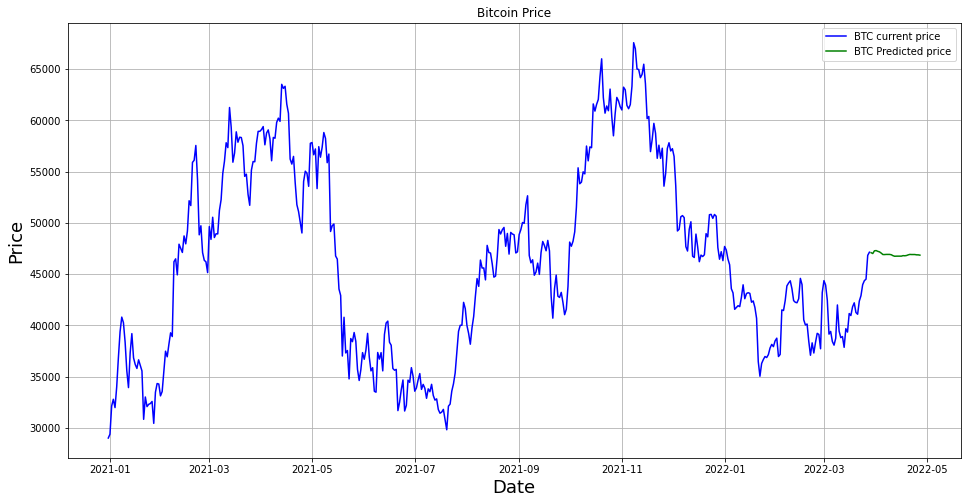

In [6]:
plt.figure(figsize = (16, 8))
plt.grid(True)

plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'green', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

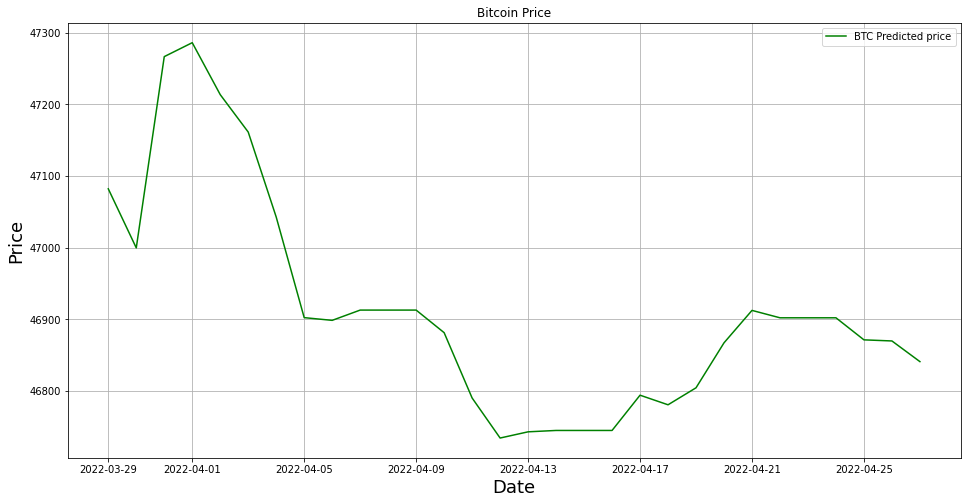

In [7]:
plt.figure(figsize = (16, 8))
plt.grid(True)

# plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'green', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()